In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('house_prices.csv')

In [3]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


# `1.` Multiple linear regression with numerical variable

In [4]:
#create intercept
df['intercept'] = 1

In [5]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


In [6]:
lm = sm.OLS(df['price'], df[['intercept','bathrooms','bedrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:32   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Understand the coef meaning
- When the value of three variables (area, bedrooms and bathrooms) = 0 , the price is 10,070
- For each additional unit increase in the area of the house the price is expected to increase by 345.9 as long as all the other variables stay the same (hoding other conditions)

# `2.` Simple linear regression with categorical variable using dummy variables

In [7]:
#using pd.get_dummies to convert categorical variables
#convert neighborhood,it come back in alphabetical order

In [8]:
df[['A','B','C']] = pd.get_dummies(df['neighborhood'], dtype = int)

In [9]:
df.head(2)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0


In [10]:
#get dummies for style
df['style'].unique()

array(['ranch', 'victorian', 'lodge'], dtype=object)

In [11]:
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'],dtype = int)

In [12]:
df.head(2)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1


### Creat Mutiple Linear regression for home style
- The column we will drop named as baseline category

In [13]:
lm = sm.OLS(df['price'], df[['intercept', 'lodge', 'ranch']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:33   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.000    1.03e+06    1.06e+06
lodge      -7.411e+05   1.44e+04    -51.396      0.000   -7.69e+05   -7.13e+05
ranch       -4.71e+05   1.27e+04    -37.115      0.000   -4.96e+05   -4.46e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Understand the coef meaning

- Here the intercepet represent the baseline category variable 
    - If the home is victorian we predict its price will be 1,046,000 dollars
- The other coef is comparsion to the intercept values
    - The Lodge home is 741,100 dollars less than Victorian home
    - The Ranch home is 471,100 dollars less than Victorian home


### Creat Mutiple Linear regression for home neighborhood
- The column we will drop named as baseline category

In [14]:
lm = sm.OLS(df['price'], df[['intercept', 'B', 'C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:33   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Understand how to know if sattistically significant

- We can compare neighborhood B to neighborhood A using p-vale "Staistically Significant"
- We can compare neighborhood C to neighborhood A using p-vale "Not Staistically Significant"
- In order to compare neighborhood B to neighborhood C, you can compare the confidence intervals. Since the confidence intervals for B and C do not overlap, we have have evidence they differ as well. 

# `3.` Multiple linear regression with numerical and categorical variable 

### Creat Mutiple Linear regression for bedrooms, bathrooms, home style and neighborhood
- The column we will drop named as baseline category

In [15]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms','bathrooms','victorian','lodge','B','C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:33   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Understand the result

- 80.9 % of the variability in price can be explained by the linear model built using bedrooms, bathrooms, neighborhood, and home style.
- For every additional bedroom a home has we can expect the price to increase by 173,200, holding all other variables constant.
- For every additional bathroom a home has we can expect the price to increase by 99,960, holding all other variables constant.
- We expect that a victorian house will cost 70,560 more than a ranch house, all else being equal.
- We expect that a house in neighborhood C will cost 7,168 less than a neighborhood A house, all else being equal.

## Note:
- One of the main assumption of multiple linear regression models is that our predictor varoables are uncorrelated with one another (Our X-variavles should be correlated with the response but not each other)

- In our expample we can imagine that the size of the home, number of bedrooms and number of bathrooms are all related to one another (larger home have more bedrooms and bathrooms)
- Lets check relation by visualtize it

# `4.` Enhance Your Model

### `4.1` Identify Multicollinearity 

#### `A)` Scatter Plot

''

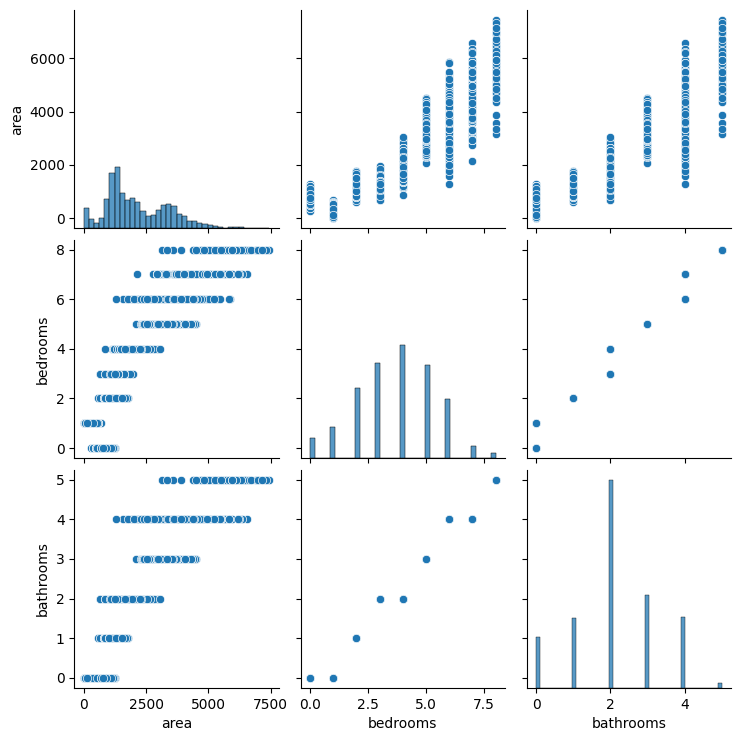

In [16]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['area', 'bedrooms', 'bathrooms']])
;

- There are a strong realtion betweer these three variables
- let's fitting a model for these variables

In [17]:
lm = sm.OLS(df['price'], df[['intercept','area', 'bedrooms','bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:52   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Despite we expect that all variables has positive relation with  price but bedrooms has a negative coefficient associated with price
- This is one potential side effect of having multicollinearity in our model

#### `B)` Variance Inflation Factors (VIFs)

- From statsmodels we can calculate the VIFs for each of our x variables
- If the inflation factors are larger than 10, we should keep only one of them

In [18]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [20]:
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


- Lets reomve bathrooms from our model

In [21]:
lm = sm.OLS(df['price'], df[['intercept','area', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:53   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### `4.2` High Order Terms

- It's possible to fit linear models that look like non-linear models by adding higer order terms linke
    - Interaxtions $X_1 * X_2$
    - Quadratics $X_1^2$
    - Cubics $X_1^3$
    - Higher Order eg $X_4$
    
- Before using these terms we should see the realtionship in our data
- Adding these terms makes interpreting the results of modle is more complex
- The interpretation you had for lower order terms are no longer easily interpreted when these terms show up such as
    - Slopes on square footage
    - Slple on the level of categorical variable
    

In [22]:
#creat an quadratic hihg order term for bedrooms
df['bedrooms_squared'] = df['bedrooms'] * df['bedrooms']

In [23]:
#we need to include lower order term 
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bedrooms_squared']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4199.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:53   Log-Likelihood:                -85302.
No. Observations:                6028   AIC:                         1.706e+05
Df Residuals:                    6025   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1.509e+05   1.58e+04      9.524      0.000     1.2e+05    1.82e+05
bedrooms          5.223e+04   8906.834      5.865      0.000    3.48e+04    6.97e+04
bedrooms_squared  2.446e+04   1184.538     20.647      0.000    2.21e+04    2.68e+04
==============================================================================
Omnibus:                      626.860   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.588
Skew:                           0.793   Prob(JB):                    9.23e-200
Kurtosis:                       4.064   Cond. No.                         87.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After adding quadratic, we can not interpret this coefficient attached to the bedrooms the same way that we do earlier
- That is, this coefficient isn't the predicted change in price for each additional bedroom any longer
- Because changing the bedroom in this term also means changing it in the squared term.
- So, the change in price is dependent on the starting and ending number of bedrooms.
- The change in price for changing from 3 to 4 bedrooms isn't the same as changing from 5 to 6 bedrooms
- So, neither of these terms is easily interpreted

In [24]:
# add Cubic term
df['bedrooms_cubed'] = df['bedrooms_squared'] * df['bedrooms']

In [25]:
#add it to the model
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bedrooms_squared', 'bedrooms_cubed']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2867.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:53   Log-Likelihood:                -85260.
No. Observations:                6028   AIC:                         1.705e+05
Df Residuals:                    6024   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         2.492e+05    1.9e+04     13.134      0.000    2.12e+05    2.86e+05
bedrooms         -1.015e+05   1.88e+04     -5.400      0.000   -1.38e+05   -6.46e+04
bedrooms_squared  7.597e+04   5680.821     13.374      0.000    6.48e+04    8.71e+04
bedrooms_cubed   -4674.8551    504.331     -9.269      0.000   -5663.525   -3686.186
==============================================================================
Omnibus:                      670.934   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.039
Skew:                           0.831   Prob(JB):                    5.16e-217
Kurtosis:                       4.097   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-Squared increased by a little bit. However, that's not evidence for including the cube number of bedrooms.

### `4.3` Interactions

In [26]:
#creat an interaction between the area and number of bedrooms 
df['area_bed'] = df['area'] * df['bedrooms']

In [27]:
#add it to the model, don't forget to add the lower terms (area and bed)
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bedrooms_squared', 'bedrooms_cubed', 'area', 'area_bed']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2539.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:53   Log-Likelihood:                -84515.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6022   BIC:                         1.691e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1.235e+04   2.15e+04      0.574      0.566   -2.99e+04    5.46e+04
bedrooms          7032.0414   1.69e+04      0.416      0.677   -2.61e+04    4.02e+04
bedrooms_squared -3740.6271   5553.642     -0.674      0.501   -1.46e+04    7146.500
bedrooms_cubed     551.5375    567.892      0.971      0.331    -561.733    1664.808
area               347.3424     22.891     15.173      0.000     302.467     392.218
area_bed            -0.9926      4.431     -0.224      0.823      -9.678       7.693
==============================================================================
Omnibus:                      368.931   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.359
Skew:                           0.520   Prob(JB):                     2.04e-74
Kurtosis:                       2.482   Cond. No.                     9.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## How do you know if you need to add an interaction term
- The Way that variable $X_1$ is related to response is dependent on the another variabe of $X_2$
- Assume $X_1$ is area and $X_2$ is neighborhood
- If the slope of (neighborhood A) is equal to the slope of (neighborhood B), both lines are parallel and the distance is consistent, no need for interaction term
    $$y^​=b_0​+b_1​x_1​+b_2​x_2​$$
- If the slopes of these two lines no longer parallel, we need to add interaction term
    $$y^​=b_0​+b_1​x_1​+b_2​x_2​+ b_3x_1x_2$$
    - The way square footage is related to the home price is dependent on which neighborhood the home is in or the way the $x1$ is related to $y$ is dependent on the value of $x2$

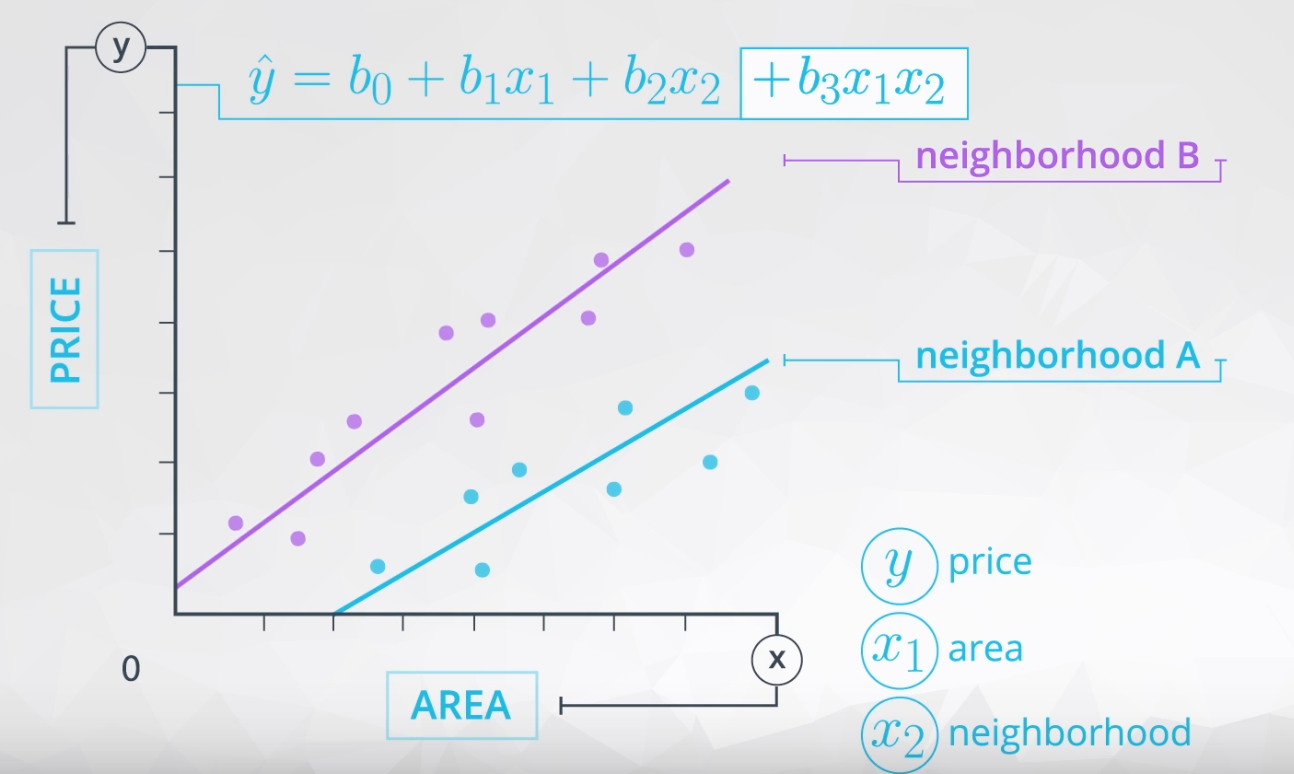

## Example

### Model 1

`1.` For the first model, fit a model to predict `price` using `neighborhood`, `style`, and the `area` of the home, creating the baselines as neighborhood C and home style **lodge**.

In [28]:
lm = sm.OLS(df['price'], df[['intercept', 'area','ranch', 'victorian','A','B']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:53   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.983e+05   5540.744    -35.791      0.000   -2.09e+05   -1.87e+05
area         348.7375      2.205    158.177      0.000     344.415     353.060
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
victorian  -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
A           -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B           5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The predicted difference in the price of a home in neighborhood in A as compared to neighborhood C, holding other variables constant is **-194.24**
- For every one unit increase in the area of a home, we predict the price of the home to increase by **348.73** (holding all other variables constant)?
- The predicted home price if the home is a lodge in neighborhood C with an area of 0 is **-198,300**
- The predicted difference in price between a victorian and lodge home, holding all other variables constant is **-6262**.

### Model 2

`2.` Now let's try a second model for predicting price.  This time, use `area` and `area squared` to predict price.  Also use the `style` of the home, but not `neighborhood` this time. 

In [29]:
df['area_squared']= df['area']*df['area']

In [30]:
lm = sm.OLS(df['price'], df[['intercept', 'area','area_squared','ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:54   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- For every one unit increase in the area of the home, we predict the price to increase by **It depends**.
- For every one unit increase in the area of the home squared, the predicted increase in price is by **It depends**.
- Based on the results, do you think adding a higher order term for area is useful in predicting the price of the home? **NO**
- The predicted difference between the price of a ranch home and a lodge, holding all other variables constant is **9917**.

### The best model might only include area and dummy variable of neighborhood B vs the other neighborhoods